In [33]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from utils import *

In [2]:
df = pd.read_pickle('../data/highered_cleaned.pkl')
data_dict = pd.read_pickle('../data/data_dictionary.pkl')

In [3]:
df.shape

(119153, 23)

In [5]:
df.columns

Index(['YEAR', 'NMRMEMG', 'HRSWKGR', 'WKSWKGR', 'OCEDRLP', 'EMSEC', 'EMSIZE',
       'GOVSUP', 'ACTCAP', 'ACTDED', 'ACTMGT', 'ACTRD', 'ACTRDT', 'ACTRES',
       'ACTTCH', 'WADEV', 'WADSN', 'WAEMRL', 'WAMGMT', 'WAOT', 'WAPROD',
       'SALARY', 'JOBSATIS'],
      dtype='object')

In [4]:
corr = df.corr()
corr.style.background_gradient('coolwarm')

,YEAR,NMRMEMG,HRSWKGR,WKSWKGR,OCEDRLP,EMSEC,EMSIZE,GOVSUP,ACTCAP,ACTDED,ACTMGT,ACTRD,ACTRDT,ACTRES,ACTTCH,WADEV,WADSN,WAEMRL,WAMGMT,WAOT,WAPROD,SALARY,JOBSATIS
YEAR,1.000000,0.006998,-0.032079,0.013484,-0.007923,0.010623,0.006075,-0.002683,-0.002064,-0.001578,-0.007086,-0.002057,0.003913,-0.000137,-0.017297,0.013419,0.032258,-0.029849,0.008687,0.051696,0.016509,0.126447,0.024054
NMRMEMG,0.006998,1.000000,-0.054799,-0.009575,-0.043225,0.064217,-0.074581,-0.090008,-0.044564,0.080433,0.007252,-0.060786,-0.054447,-0.108374,0.015275,0.077097,0.083639,0.018050,-0.007767,0.013196,-0.014731,0.025518,-0.011618
HRSWKGR,-0.032079,-0.054799,1.000000,0.113336,-0.060319,-0.138168,0.277005,0.128729,-0.028350,0.002280,0.081113,0.165593,0.126802,0.153226,0.040474,0.063975,0.076218,0.147187,0.267545,0.016312,0.052312,0.336737,0.000015
WKSWKGR,0.013484,-0.009575,0.113336,1.000000,0.121455,0.263378,-0.072944,-0.001400,0.077736,0.127059,0.129370,-0.000732,-0.130680,-0.059375,-0.333016,0.128221,0.099651,0.047527,0.069550,-0.054456,0.072017,0.205446,0.020646
OCEDRLP,-0.007923,-0.043225,-0.060319,0.121455,1.000000,0.313593,-0.145334,-0.111980,0.156175,0.104303,0.168872,-0.181404,-0.285704,-0.255004,-0.268137,0.058244,0.071403,0.033394,-0.002082,-0.003740,0.064450,0.059392,0.114735
EMSEC,0.010623,0.064217,-0.138168,0.263378,0.313593,1.000000,-0.496017,-0.235852,0.167074,0.376113,0.190010,-0.087856,-0.330410,-0.279425,-0.591467,0.336011,0.250593,-0.005882,-0.024502,-0.081911,0.123170,0.263368,0.016759
EMSIZE,0.006075,-0.074581,0.277005,-0.072944,-0.145334,-0.496017,1.000000,0.163866,-0.020922,-0.056377,-0.101512,0.226853,0.316990,0.256072,0.242887,-0.032613,-0.003708,0.031088,0.111873,0.029027,-0.023399,0.069811,0.066846
GOVSUP,-0.002683,-0.090008,0.128729,-0.001400,-0.111980,-0.235852,0.163866,1.000000,-0.013461,-0.079433,-0.033850,0.246532,0.182360,0.296503,-0.036469,-0.034439,0.035309,0.041152,0.140463,-0.031949,-0.013096,0.007129,-0.027988
ACTCAP,-0.002064,-0.044564,-0.028350,0.077736,0.156175,0.167074,-0.020922,-0.013461,1.000000,0.067892,-0.134531,-0.010402,-0.064923,-0.109980,-0.173766,0.074842,0.137946,-0.091332,-0.133057,-0.073275,-0.001917,0.043416,0.052300
ACTDED,-0.001578,0.080433,0.002280,0.127059,0.104303,0.376113,-0.056377,-0.079433,0.067892,1.000000,-0.120276,0.358688,0.258934,-0.146744,-0.306136,0.570396,0.464361,-0.055312,-0.021034,-0.097832,0.143264,0.155688,0.060777


In [9]:
# sorting by highest correlations to our target variable, EMSEC
correlations = corr['EMSEC'].sort_values(ascending=False)
correlations

EMSEC       1.000000
ACTDED      0.376113
WADEV       0.336011
OCEDRLP     0.313593
WKSWKGR     0.263378
SALARY      0.263368
WADSN       0.250593
ACTMGT      0.190010
ACTCAP      0.167074
WAPROD      0.123170
NMRMEMG     0.064217
JOBSATIS    0.016759
YEAR        0.010623
WAEMRL     -0.005882
WAMGMT     -0.024502
WAOT       -0.081911
ACTRD      -0.087856
HRSWKGR    -0.138168
GOVSUP     -0.235852
ACTRES     -0.279425
ACTRDT     -0.330410
EMSIZE     -0.496017
ACTTCH     -0.591467
Name: EMSEC, dtype: float64

/var/folders/n9/3mjn__fd1xd66lc1zh9nlj0h0000gp/T/ipykernel_53910/1711106592.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


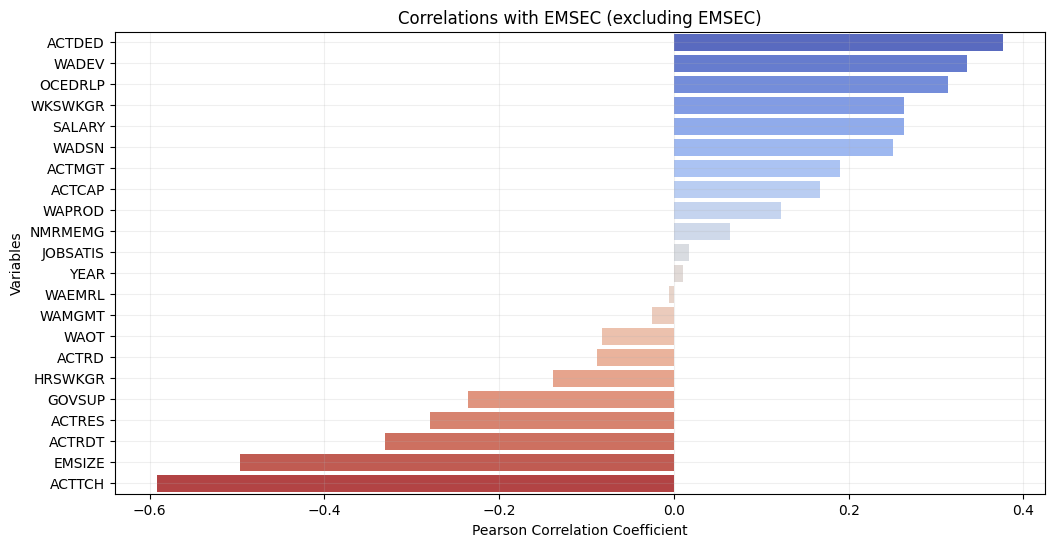

In [18]:
# Exclude 'EMSEC' from the plot
correlations = correlations[correlations.index != 'EMSEC']

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Correlations with EMSEC (excluding EMSEC)')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Variables')
plt.grid(alpha=0.2)
plt.show()

In [27]:
X = df[df.columns[:-1]]
y = df['EMSEC']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
k = 3  # You can experiment with different values
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = knn_model.predict(X_test)

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9860266040031891

Confusion Matrix:
 [[12168   125]
 [  208 11330]]

Classification Report:
               precision    recall  f1-score   support

           2       0.98      0.99      0.99     12293
           4       0.99      0.98      0.99     11538

    accuracy                           0.99     23831
   macro avg       0.99      0.99      0.99     23831
weighted avg       0.99      0.99      0.99     23831



In [ ]:
X = grouped_df[['Count']]